In [32]:
from Quadratics import FindPolynomial as FP
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

<h1> 2D Example </h1>

Let's start off with an example! Assume the 2d cubic, $$y = a^3 + 2a^2 - 5a^1 + 4a^0$$ 
passing through the points $(0, 4), (1, 2), (-1, 10), (2,10)$.

The equation for this can be found using the following code:

In [33]:
degree = 3
dimensions = 2
input_vals = np.array([[0], [1], [-1], [2]])
output = np.array([[4],[2],[10], [10]])

FP.find_equation_Human(degree, dimensions, input_vals, output)

'+ 1.0 a³ + 2.0 a² - 5.0 a¹ + 4.0 a⁰ '

Graphing the equation and points with `matplotlib.pyplot` yields the following:

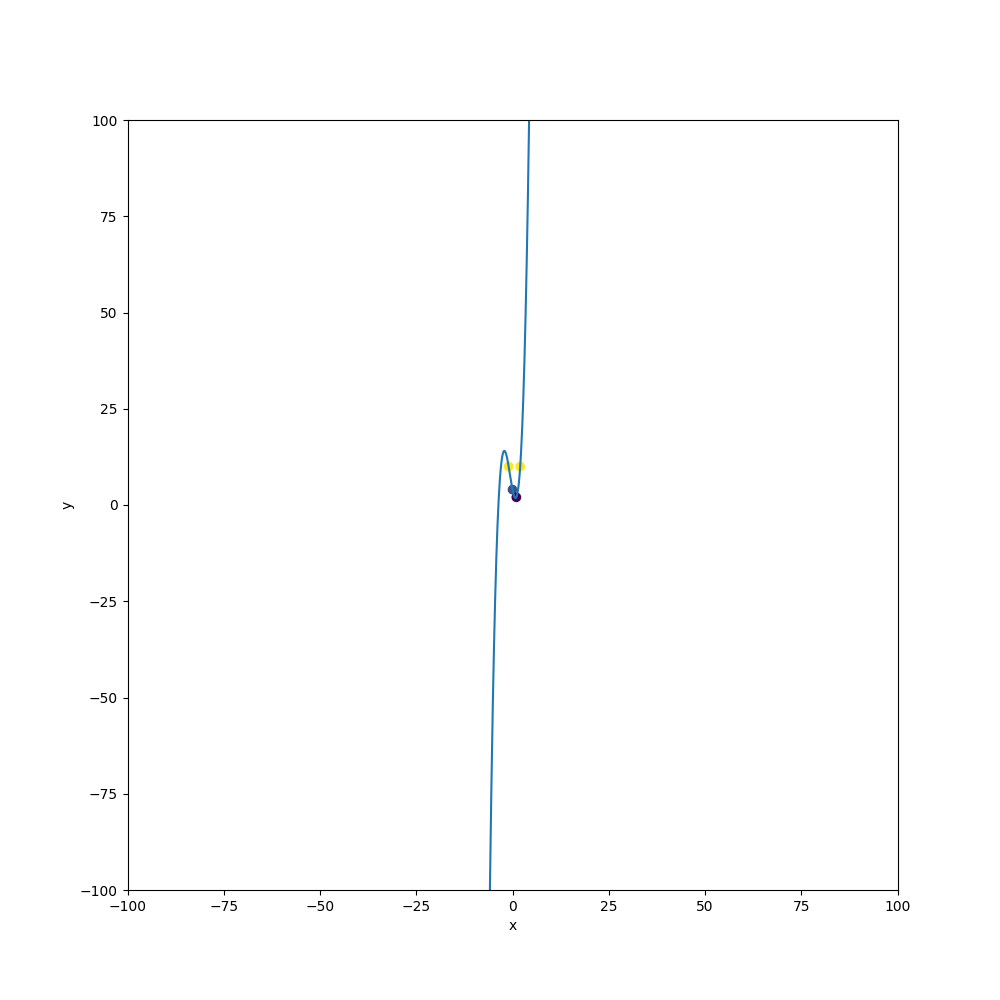

In [34]:
answers = FP.find_equation(degree, dimensions, input_vals, output)
FP.find2dEquation(input_vals, output, answers, degree, dimensions)

<h2><b>The 2D and 3D graphs are interactive!</b></h2> (in vscode)

Double checking our work in desmos over $D: [-100, 100], R: [-100, 100]$ yields the following:

<img src='DesmosCubic.png' style="height: 75%; width: 75%"> </img>

<h1> 3D Example </h1>

Now for a 3D Example.
Suppose the equation we want to find is: $$ z = x^2 - y^2 + 1 $$ And it passes through the points: $$(0, 0, 1), \\ (1, 1, 1), \\ (-1, -1, 1), \\ (1, 2, -2), \\ (2, 1, 4), \\ (0, 1, 0), \\ (0, 2, -3), \\ (3, 3, 1), \\ (3, 2, 6)$$

In [35]:
degree = 2
dimensions = 3
input_vals = np.array([[0, 0], [1, 1], [-1, -1], [1, 2], [2, 1], [0, 1], [0, 2], [3, 3], [3, 2]])
output = np.array([    [1],     [1],     [1],     [-2],    [4],    [0],    [-3],   [1],    [6]])

FP.find_equation_Human(degree, dimensions, input_vals, output)

'- 1.0 a⁰b² + 1.0 a²b⁰ + 1.0 a⁰b⁰ '

a = x, b = y, c = z, etc.

In [36]:
#checking our work-> 0 means they're equal
i = 0
for n in input_vals:
    print(output[i]-(n[0]**2-n[1]**2+1))
    i+=1

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


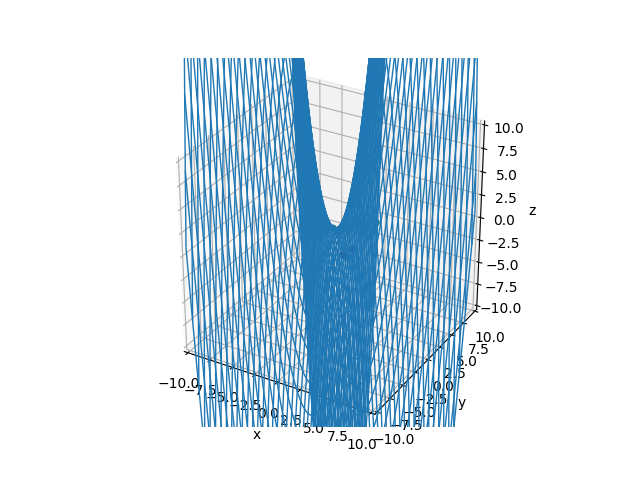

In [37]:
answers = FP.find_equation(degree, dimensions, input_vals, output)
FP.find3dEquation(input_vals, output, degree, dimensions, answers)

I've included a link to Desmos with the graph and the points below. Feel free to verify!
<br>

https://www.desmos.com/3d/1ab0d742ae


<h1>Diving into the Math</h1>

<b><h3> How many points? </h3>

The relationship between your equations and the amount of unique points needed is defined by: $$p_{points} = (d_{degree} + 1)^{d_{dimensions} -1}$$ where $p_{points}$ is the amount of points you need to input, $d_{degree}$ is the degree of your polynomial, and $d_{dimensions}$ is the amount of dimensions it passes through.

$p_{points}$ not only represents the amount of points you need, but also the amount of coefficients in that equation's standard form. $$y = ax^1 + bx^0$$ $$y = ax^3 + bx^2 + cx^1 + dx^0$$ In 3D, the amount of coefficients scale even more rapidly: $$z = ax^1y^1 + bx^0y^1 + cx^1y^0 + dx^0y^0$$ $$z = ax^2y^2 + bx^1y^2 + cx^0y^2 + dx^2y^1 + ex^1y^1 + fx^0y^1 + gx^2y^0 + hx^1y^0 + ix^0y^0$$
*note the cyclic nature of the exponents: $x^{2, 1, 0, 2, 1, 0, 2, 1, 0}$ and $y^{2, 2, 2, 1, 1, 1, 0, 0, 0}$

4D example: 
$$Z = ax^1y^1z^1 + bx^1y^1z^0 + cx^1y^0z^1 + dx^1y^0z^0 + ex^0y^1z^1 + fx^0y^1z^0 + gx^0y^0z^1 + hx^0y^0z^0$$

<b><h3> Matrix Multiplication </h3>

You can display the coeffecients you want to find using systems of equations and matrices. For the general quadratic $ax^2 + bx + c = y$, you need three points to get a classical system set up:
$$
\left\{ 
\begin{array}{c}
ax^2_1+bx_1+c=y_1 \\ \\
ax^2_2+bx_2+c=y_2 \\ \\
ax^2_3+bx_3+c=y_3
\end{array}
\right. 
$$

Next, all you have to do is convert this into a matrix: 
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}

From here, the math is simple:

$$
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = 
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$

$$
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = 
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}^{-1}
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$




<h3> <b> numpy's matrix operations 

numpy represents an element in a matrix as $A_{ij}$. When adding a scalar to the entire matrix, it performs $B_{ij} =  A_{ij} + c$, where $c$ is a scalar. A negative $c$ would be the same as subtraction. When dividing a matrix, you will get a new matrix such that $B_{ij} =  \frac{c}{A_{ij}}$.
Another way to view operations is as numpy broadcasting the scalar until it has the correct dimensions, and then performing the designated operation.

During exponentiation, one case is $c^A$, which will return a matrix $B_{ij}$ such that $B_{ij} = c^{A_{ij}}$. The final case is $A^C$, which will return a matrix $B_{ij}$ such that $B_{ij} = (A_{ij})^{C_{ij}}$. 


<b><h3>Code Tracing & Explaination</h3>

The main code: 
```py
main = np.ones([general, general])
for i in range(general): #equation number
  for j in range(general): #equation element
    counter = degree**np.arange(dimSmall)
    middle = (j//counter)%degree
    main[i, j] = np.prod(input_vals[i, :]**(degree-middle-1))
```
In this code, `main` is our generalized coefficient. `i` represents the current row, or equation. `j` represents the current column, or the current element of the current equation. 
We will trace our code with the equation $x^1y^1 + x^0y^1 + x^1y^0 + x^0y^0$.
The variable `counter` raises $2$ (remember, `degree = degree + 1`, or $2 = (1) + 1$) to the array [0, 1], or mathematically,
$$2^{\begin{bmatrix} 0 & 1 \end{bmatrix}}$$
This outputs `counter` = $\begin{bmatrix} 1 & 2 \end{bmatrix}$. 

Next, to get `middle` we take $j_{currentElement}$ and divide it by `counter`, flooring the result. Finally, we take our product and $\bmod 2$ it for the final value of `middle`.

$$\left(\frac{0}{\begin{bmatrix} 1 & 2 \end{bmatrix}}\right)\bmod 2$$

Thus, `middle` = $\begin{bmatrix} 0 & 0 \end{bmatrix}$

Finally, we take the product of the input values raised to our array matrices: `np.prod(input_vals[i, :]**(degree-middle-1))` 

<b>Assume that `input_vals[i, :] = [1, 2]`</b>
$$ \begin{bmatrix} 1 & 2 \end{bmatrix}^{2-\begin{bmatrix} 0 & 0 \end{bmatrix}-1} $$


Yielding a new array $\begin{bmatrix} 1 & 2 \end{bmatrix}$. Taking the `np.prod` of this array yields all of the elements multiplied by each other. Thus, $x^1y^1$ evaluates to $2$. 

Working through `j=1` quickly, we get 
$$\left(\frac{1}{\begin{bmatrix} 1 & 2 \end{bmatrix}}\right)\bmod 2$$
$$\begin{bmatrix} 1 & 2 \end{bmatrix}^{\begin{bmatrix} 0 & 1 \end{bmatrix}} $$

$$x^0y^1 = 2$$

<h1>Degree Mislabelling<h1>

When inputting points from a linear equation into, say, a cubic, the program still works, giving you your desired equation. However, putting in points from a quadratic into a linear will also give you an equation, just not a quadratic. 

In [38]:
degree = 3
dimensions = 2
input_vals = np.array([[0],[1],[2],[3]])
output = np.array([[0],[1],[2],[3]])

FP.find_equation_Human(degree, dimensions, input_vals, output)

'+ 1.0 a¹ '

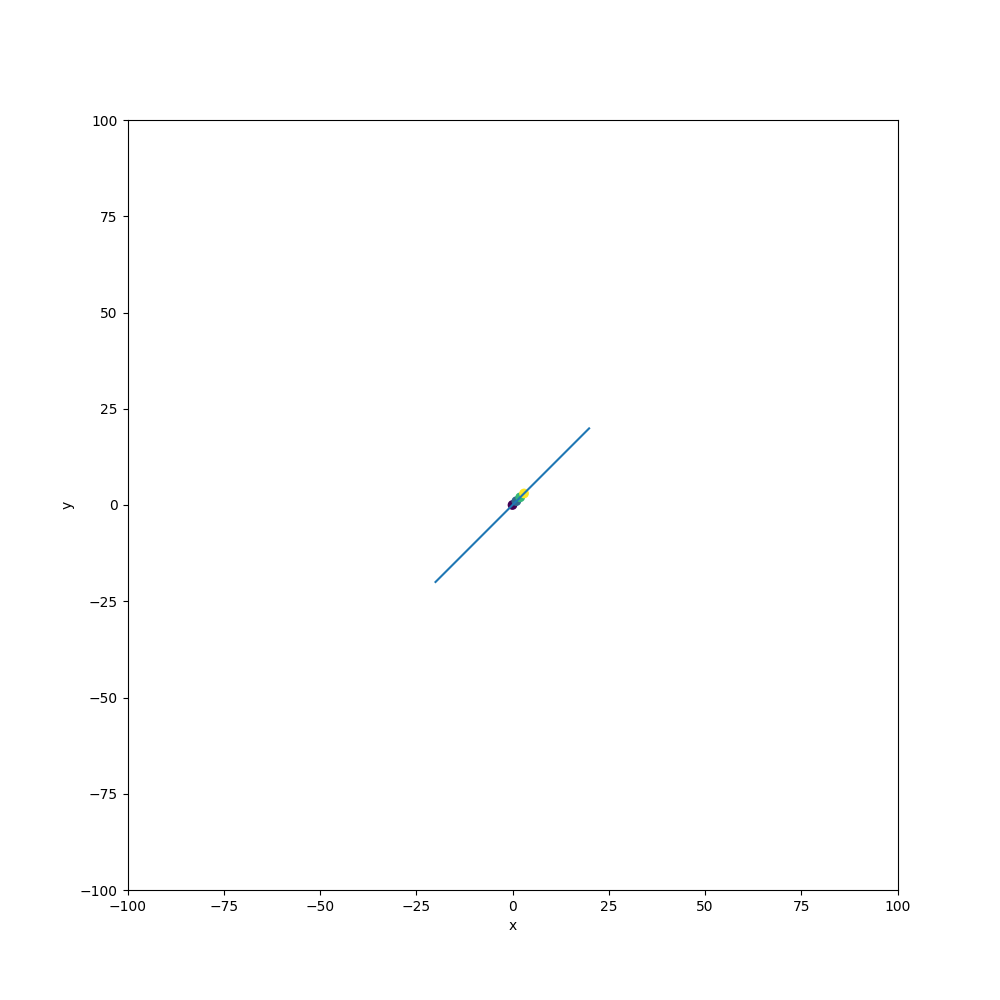

In [39]:
answers = FP.find_equation(degree, dimensions, input_vals, output)
FP.find2dEquation(input_vals, output, answers, degree, dimensions)

$$z = x + y$$
This is also true for 3D:

In [40]:
degree = 2
dimensions = 3
input_vals = np.array([[0, 0], [1, 0], [0, 1], [1, 1], [1, 2], [2, 1], [2, 2], [2, 3], [3, 2]])
output = np.array([[0], [1],[1],[2],[3],[3],[4],[5],[5]])

FP.find_equation_Human(degree, dimensions, input_vals, output)

'+ 1.0 a⁰b¹ + 1.0 a¹b⁰ '

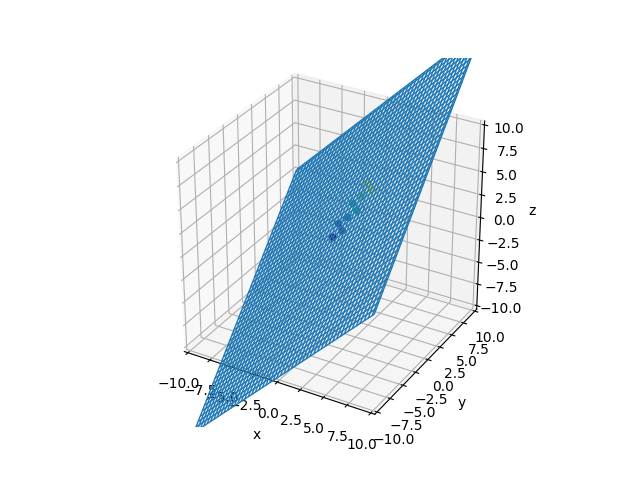

In [41]:
answers = FP.find_equation(degree, dimensions, input_vals, output)
FP.find3dEquation(input_vals, output, degree, dimensions, answers)

Via the Pigeonhole Principle, this is not reversible.


<h1>Exceptions<h1>

Exceptions are far and few between, for the most part. However, the possibilites scale as you go into higher and higher dimensions. 

First, do not input only the zeroes of a function. You will always get a linear equation. Even one non-zero is enough to prevent this from happening.

Secondly, the program fails to work when the matrix $A$ is linearly dependent. If all the input points could be represented on a $(N-2)D$ Manifold, you'll get a `Singular Matrix` Error. Another way to describe this phenomenon would be as follows: If the input points are an axis about which equations can rotate, it is impossible to find and equation. In 3D space, if you input points on a line, you'll get this error (a plane can be rotated about a line in 3D to get a new equation that also passes through input points.) In 4D space, you can't input coordinates on the same line, or on the same plane. In 2D space, if you input the same point multiple times, you'll get this error.

Finally, the program fails is if you give the same input multiple outputs.

In terms of applications (mentioned later), this doesn't matter at all. It is impossible to realisticly have a line in 3D space.



<img src='Exception.png' style="height: 25%; width: 25%"> </img>

If all your points fall on some (1D)$r$ in 3D space, you could rotate a plane about $r$ and still have an entirely new equation that passes through your same points. Scales to a plane in 4D, and surface in 5D. 

<h1>Experiment</h1>

With your new knowledge, feel free to clone the repository and experiment with equations.

In [42]:

# degree = 
# dimensions = 
# input_vals = 
# output = 

# FP.find_equation_Human(degree, dimensions, input_vals, output)

In [43]:
# answers = FP.find_equation(degree, dimensions, input_vals, output)
# FP.find3dEquation(input_vals, output, degree, dimensions, answers)

<h1> Applications </h1>

The main application for this is in Machine Learning. By having a machine record the value of its neurons, and the associated cost enough times, it will be possible to find the exact cost function of the machine. Taking derivatives of the function would yield global minima. You could then surgically move the machine's inputs to the highest possible efficiency.  Of course, one limiting factor is how much input you have: if your neural network is comprised of $100$ Dense layers with $100$ neurons each, you have $10,000$ neurons total. Plugging this into our equation from before, your cost function would be $10,000$ Dimensional. Assuming the degree of your Cost function is $100$, or $200$, you would need $101^{10000}$ input and output pairs to fully predict the cost function of your algorithm. This would require terabytes, if not petabytes, of data. Though not applicable yet, a future civilization with much more computing power could run this on giant neural networks, or today's civilization could use this for smaller projects.

When using this with an AI, it is possible to only input `input_vals` and `output`, by setting the rest of the vars in the `def`:
```py
dimensionality = int(len(input_vals[0]) + len(output[0]))
dimSmall = int(dimensionality - 1)
first_dim = int(len(output)**(1/dimSmall))
general = int((first_dim)**(dimensionality-1))
```
You could also just pass in `values` and edit the code to work with one array, or a `Pandas` CSV without too much difficulty. 

Though untested by me, there may be a different way to find the $C(x)$ of a neural network. If we are able to derive a general Point-Derivative form for any-D equations, it may be possible to calculate the exact cost function of an AI before the universe ends. 

Possible Point-Derivative Form:  $$f(x) = f'(x)(x - x_1) + y_1$$ 
This is PD form for a linear 2d equation. I have yet to test it for quadratics. If this is not a dead end, I will follow up on my GitHub.

<h1> Pure Math <h1>

Assume that all the array operations are the same as in `numpy`. A number `n` raised to an `array` is undefined in linear algebra, but I feel `numpy`'s definition makes sense. 

Variables: 


$d_{degree} = degree + 1$

$d_{dimension} = dimensions$

$p = degree^{d_{dimension}-1}$

Contains your variables (as letters):

$V = \begin{bmatrix} a_1 & ... & a_p\end{bmatrix}$

Variables Formula:
$$E = \sum_{i=0}^{p-2}\left(\prod_{j=0}^{p-2}{V_j^{d_{degree}-[\lfloor{\left(\frac{j}{d_{degree}^j}\right)\rfloor}\bmod{d_{degree}}]-1}}\right)$$



Points Formula:

$I = \begin{bmatrix} x_1 & y_1 & ... \\ ...&...&... \\ x_p & y_p & ... \end{bmatrix}$

$C = \begin{bmatrix} z_1 \\ ... \\ z_p \end{bmatrix}$

In below equation, $Z$ is the equation number from $B$. 
$$E = \sum_{i=0}^{p-2}\left(\prod_{j=0}^{p-2}{I_{Z, j}^{d_{degree}-[\lfloor{\left(\frac{j}{d_{degree}^j}\right)\rfloor}\bmod{d_{degree}}]-1}}\right)$$

Replace $+$ and $-$ with commas.
$$ B = \begin{bmatrix} E_0 \\ ... \\ E_p \end{bmatrix}$$

$$A = B^{-1}C
$$


Bonus: 

$d = dimensions - 1$
The Multinomial Theorem! I'm talking about this here because it not only lets you find the expansion for your polynomial -when you plug in the correct values- but it also gives an alternative (albiet lazy) solution to also find your exponent values, without using the equations I listed above. It uses summations of summations, which could be represented as infinite `for` loops. This works, but the amount of variables and your time space complexity would be out the roof. My program offers an easy, $O(n^2+4n)$ runtime (I am not sure about the 4n, since I don't know if numpy's methods run in $O(n)$ or $O(1)$ time.)
Plugging in $2^d$ points into the Multinomial Theorem gives the expanded form for a linear n-D equation.

 Multinomial Theorem with $2^d$ points:
$$(x_1 + x_2 + ... + x_{2^d})^n = \sum_{k_1; k_2;...;k_{2^d}}^{k_1+k_2+...+k_{2^d}=n} {n \choose k_1; k_2;...;k_{2^d}}x_1^{k_1}x_2^{k_2}...x_{2^d}^{k_{2^d}}$$
Replacing $2^d$ with $p$ will yield the expanded form for a polynomial n-D equation.


Pascal's Triangle row 3, an expanded 2D quadratic: $$\begin{bmatrix}1 & 2 & 1\end{bmatrix}$$
<br>


Pascal's Pyramid(not Tetrahedron) row 3, an expanded 3D quadratic: $$(x+1)^2$$ $$\begin{bmatrix} y \\ + \\ 1\end{bmatrix}^2 \begin{bmatrix}1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1\end{bmatrix}$$
The column represents $(y+1)^2$ and the row represents $(x+1)^2$<br></br>

Pacal's 4D-triangle-analog row 3 would be best represented as a 3D Matrix. I represent it as 3, 2D matrices, with each matrix representing a "slice:"
$$\begin{bmatrix}1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1\end{bmatrix} \begin{bmatrix}2 & 4 & 2 \\ 4 & 8 & 4 \\ 2 & 4 & 2\end{bmatrix} \begin{bmatrix}1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1\end{bmatrix}$$
The actual cube would have side lengths $(x+1)^2$, $(y+1)^2$, and $(z+1)^2$, with the volume equaling the quadratic.
<br>


For an expanded 2D Cubic, you would plug in a (2D Linear)^3 into the $MT$, or: $$(x + 1)^3$$
For an expanded 3D Cubic, you would plug in a (3D Linear)^3 into the $MT$, or: $$((x+1)(y+1))^3$$

